# Simulacion Procesos Random Walk y ARIMA(p,d,q)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statistics as st

In [140]:
# Descarga del indice del mercado  financiero mexicano (IPyC)
ticket = '^MXX'
mxx = yf.download(tickers=ticket, start='2000-01-01', interval='1d')
# seleccionamos el indice ajustado
mxx=mxx['Adj Close']
mxx

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-03     7077.709961
2000-01-04     6675.270020
2000-01-05     6764.310059
2000-01-06     6751.649902
2000-01-07     7047.089844
                  ...     
2023-10-06    49666.500000
2023-10-09    49297.148438
2023-10-10    50289.859375
2023-10-11    50344.738281
2023-10-12    49684.691406
Name: Adj Close, Length: 5972, dtype: float64

In [141]:
# Estimo el parametro del drift utilizando el valor del logaritmo del dia 1 y del ultimo dia
lnmxx = np.log(mxx)
n= len(lnmxx)
phi0 = (lnmxx[-1]-lnmxx[0])/n
phi0

0.00032631387510396846

In [142]:
# Calculo desviacion estandar del error

sigma = np.std(lnmxx)/np.sqrt(n)
sigma

0.009508610170524515

In [143]:

#ySim = y0 + phi1*ysim[t-1] + error; phi1=1
#El valor inicial:
#y0=lnmxx[0]
y0 = 0.1
phi1=0.99
#Ahora simulamos todos los dias siguiendo la equacion(apartir del dia 1)
#Ysimln[t]=y0+phi0+phi1*ysimln[t-1]+error
ysimln=[]
ysimln.append(y0)
for i in range(1,n):
  error=np.random.normal(0,sigma)
  ysimln.append(phi0+phi1*ysimln[i-1]+error)

ysimln[0:5]

[0.1,
 0.10615544358332563,
 0.11328152361977238,
 0.10550983005827694,
 0.10313882093251109]

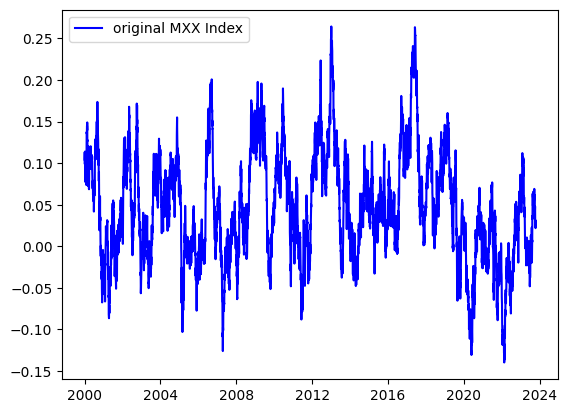

In [144]:
ysim=pd.DataFrame(lnmxx)
ysim['ysimln']=ysimln
ysim

#plt.plot(ysim['Adj Close'],color='r')
plt.plot(ysim['ysimln'],color='b')
plt.legend(['original MXX Index','Random walk with a drif'],loc='upper left')
plt.show()

In [145]:
#promedio teorico
print(phi0/(1-phi1))
#promedio simulado
ysim['ysimln'].mean()

0.03263138751039682


0.04662255822540564